STUDENT INFORMATION

BITS ID: 2025AA05018

Name: Prajapati Jay Hiteshkumar

Email: 2025aa05018@wilp.bits-pilani.ac.in

Date: 8th Feb, 2026

# Telco Customer Churn Prediction using Machine Learning

## Problem Statement

Customer churn refers to customers discontinuing their service with a company. In the telecommunications industry, customer retention is crucial because acquiring new customers is significantly more expensive than retaining existing ones.

The objective of this assignment is to build and compare multiple machine learning classification models to predict whether a customer will churn based on demographic, service usage, and billing information.

This is a binary classification problem where:

- 0 → Customer does not churn
- 1 → Customer churns


## Dataset Description

The Telco Customer Churn dataset contains information about 7,000+ customers of a telecommunications company.

After preprocessing and removing missing values:

- Total instances: 7,032
- Number of features (after encoding): 30
- Target variable: `Churn`

### Feature Categories

1. Demographic Features:
   - Gender
   - SeniorCitizen
   - Partner
   - Dependents

2. Account Information:
   - Tenure
   - Contract type
   - Payment method
   - Paperless billing

3. Service Information:
   - Internet service
   - Phone service
   - Streaming services
   - Online security
   - Tech support

4. Billing Information:
   - MonthlyCharges
   - TotalCharges

The dataset contains both categorical and numerical features. Categorical features were one-hot encoded for model compatibility.


In [1]:
# Code Block 1: Load Telco Customer Churn Dataset (Working Public URL)

import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"

df = pd.read_csv(url)

print("Shape of dataset:", df.shape)

print("\nColumn Names:")
print(df.columns)

print("\nFirst 5 rows:")
display(df.head())


Shape of dataset: (7043, 21)

Column Names:
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

First 5 rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
# Code Block 2: Cleaning & Type Fixing

# 1. Drop customerID (not useful for prediction)
df = df.drop("customerID", axis=1)

# 2. Convert TotalCharges to numeric (it is object because of blank spaces)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# 3. Check missing values again
print("Missing values after conversion:\n")
print(df.isnull().sum())

# 4. Check data types
print("\nUpdated Data Types:\n")
print(df.dtypes)


Missing values after conversion:

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Updated Data Types:

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        ob

In [3]:
# Code Block 3: Drop Missing Values

df = df.dropna()

print("Shape after dropping missing rows:", df.shape)
print("Total remaining missing values:", df.isnull().sum().sum())


Shape after dropping missing rows: (7032, 20)
Total remaining missing values: 0


In [4]:
# Code Block 4: Encoding

# 1. Convert target variable Churn to numeric
df["Churn"] = df["Churn"].map({"No": 0, "Yes": 1})

# 2. Separate features and target
X = df.drop("Churn", axis=1)
y = df["Churn"]

# 3. One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

print("Shape after encoding:", X.shape)
print("\nFirst 5 rows of encoded features:")
display(X.head())

print("\nTarget distribution:")
print(y.value_counts())


Shape after encoding: (7032, 30)

First 5 rows of encoded features:


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False



Target distribution:
Churn
0    5163
1    1869
Name: count, dtype: int64


In [5]:
# Code Block 5: Train-Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # keeps class distribution consistent
)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)

print("\nTraining target distribution:")
print(y_train.value_counts(normalize=True))

print("\nTesting target distribution:")
print(y_test.value_counts(normalize=True))


Training shape: (5625, 30)
Testing shape: (1407, 30)

Training target distribution:
Churn
0    0.734222
1    0.265778
Name: proportion, dtype: float64

Testing target distribution:
Churn
0    0.734186
1    0.265814
Name: proportion, dtype: float64


In [6]:
# Code Block 6: Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaled training shape:", X_train_scaled.shape)
print("Scaled testing shape:", X_test_scaled.shape)


Scaled training shape: (5625, 30)
Scaled testing shape: (1407, 30)


In [7]:
# Code Block 7: Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, matthews_corrcoef
)

# Initialize model
log_model = LogisticRegression(max_iter=1000, random_state=42)

# Train
log_model.fit(X_train_scaled, y_train)

# Predict
y_pred_log = log_model.predict(X_test_scaled)
y_prob_log = log_model.predict_proba(X_test_scaled)[:, 1]

# Metrics
log_accuracy = accuracy_score(y_test, y_pred_log)
log_precision = precision_score(y_test, y_pred_log)
log_recall = recall_score(y_test, y_pred_log)
log_f1 = f1_score(y_test, y_pred_log)
log_auc = roc_auc_score(y_test, y_prob_log)
log_mcc = matthews_corrcoef(y_test, y_pred_log)

print("Logistic Regression Metrics:")
print("Accuracy:", log_accuracy)
print("Precision:", log_precision)
print("Recall:", log_recall)
print("F1 Score:", log_f1)
print("AUC Score:", log_auc)
print("MCC Score:", log_mcc)


Logistic Regression Metrics:
Accuracy: 0.8038379530916845
Precision: 0.6475903614457831
Recall: 0.5748663101604278
F1 Score: 0.6090651558073654
AUC Score: 0.8356727976766699
MCC Score: 0.4802664186227414


In [8]:
# Code Block 8: Decision Tree

from sklearn.tree import DecisionTreeClassifier

# Initialize model
dt_model = DecisionTreeClassifier(random_state=42)

# Train
dt_model.fit(X_train, y_train)  # trees do NOT need scaled data

# Predict
y_pred_dt = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

# Metrics
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)
dt_auc = roc_auc_score(y_test, y_prob_dt)
dt_mcc = matthews_corrcoef(y_test, y_pred_dt)

print("Decision Tree Metrics:")
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1 Score:", dt_f1)
print("AUC Score:", dt_auc)
print("MCC Score:", dt_mcc)


Decision Tree Metrics:
Accuracy: 0.7185501066098081
Precision: 0.4701086956521739
Recall: 0.4625668449197861
F1 Score: 0.46630727762803237
AUC Score: 0.636638004669438
MCC Score: 0.2752211543401118


In [9]:
# Code Block 9: K-Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier

# Initialize model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train
knn_model.fit(X_train_scaled, y_train)

# Predict
y_pred_knn = knn_model.predict(X_test_scaled)
y_prob_knn = knn_model.predict_proba(X_test_scaled)[:, 1]

# Metrics
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn)
knn_recall = recall_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)
knn_auc = roc_auc_score(y_test, y_prob_knn)
knn_mcc = matthews_corrcoef(y_test, y_pred_knn)

print("KNN Metrics:")
print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1 Score:", knn_f1)
print("AUC Score:", knn_auc)
print("MCC Score:", knn_mcc)


KNN Metrics:
Accuracy: 0.7540867093105899
Precision: 0.5374331550802139
Recall: 0.5374331550802139
F1 Score: 0.5374331550802139
AUC Score: 0.7673745023838983
MCC Score: 0.36995977657101736


In [10]:
# Code Block 10: Naive Bayes

from sklearn.naive_bayes import GaussianNB

# Initialize model
nb_model = GaussianNB()

# Train
nb_model.fit(X_train_scaled, y_train)

# Predict
y_pred_nb = nb_model.predict(X_test_scaled)
y_prob_nb = nb_model.predict_proba(X_test_scaled)[:, 1]

# Metrics
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_precision = precision_score(y_test, y_pred_nb)
nb_recall = recall_score(y_test, y_pred_nb)
nb_f1 = f1_score(y_test, y_pred_nb)
nb_auc = roc_auc_score(y_test, y_prob_nb)
nb_mcc = matthews_corrcoef(y_test, y_pred_nb)

print("Naive Bayes Metrics:")
print("Accuracy:", nb_accuracy)
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("F1 Score:", nb_f1)
print("AUC Score:", nb_auc)
print("MCC Score:", nb_mcc)


Naive Bayes Metrics:
Accuracy: 0.644633972992182
Precision: 0.4183937823834197
Recall: 0.8636363636363636
F1 Score: 0.5636998254799301
AUC Score: 0.8101824290395555
MCC Score: 0.3808268119388292


In [11]:
# Code Block 11: Random Forest

from sklearn.ensemble import RandomForestClassifier

# Initialize model
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

# Train
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Metrics
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_auc = roc_auc_score(y_test, y_prob_rf)
rf_mcc = matthews_corrcoef(y_test, y_pred_rf)

print("Random Forest Metrics:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)
print("AUC Score:", rf_auc)
print("MCC Score:", rf_mcc)


Random Forest Metrics:
Accuracy: 0.7874911158493249
Precision: 0.6229508196721312
Recall: 0.5080213903743316
F1 Score: 0.5596465390279823
AUC Score: 0.8183733583198307
MCC Score: 0.4253066197693461


In [12]:
# Code Block 12: XGBoost

from xgboost import XGBClassifier

# Initialize model
xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Metrics
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_precision = precision_score(y_test, y_pred_xgb)
xgb_recall = recall_score(y_test, y_pred_xgb)
xgb_f1 = f1_score(y_test, y_pred_xgb)
xgb_auc = roc_auc_score(y_test, y_prob_xgb)
xgb_mcc = matthews_corrcoef(y_test, y_pred_xgb)

print("XGBoost Metrics:")
print("Accuracy:", xgb_accuracy)
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print("F1 Score:", xgb_f1)
print("AUC Score:", xgb_auc)
print("MCC Score:", xgb_mcc)


/Users/jay/Desktop/BITS Pilani WILP/SEM1/ML/Assignments/Assignment 2/env311/lib/python3.11/site-packages/xgboost/training.py:200: UserWarning: [15:12:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Metrics:
Accuracy: 0.783226723525231
Precision: 0.6074766355140186
Recall: 0.5213903743315508
F1 Score: 0.5611510791366906
AUC Score: 0.8340770612566067
MCC Score: 0.42047821025279514


In [13]:
# Code Block 13: Create Comparison Table

import pandas as pd

results = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Decision Tree",
        "KNN",
        "Naive Bayes",
        "Random Forest",
        "XGBoost"
    ],
    "Accuracy": [
        log_accuracy,
        dt_accuracy,
        knn_accuracy,
        nb_accuracy,
        rf_accuracy,
        xgb_accuracy
    ],
    "AUC": [
        log_auc,
        dt_auc,
        knn_auc,
        nb_auc,
        rf_auc,
        xgb_auc
    ],
    "Precision": [
        log_precision,
        dt_precision,
        knn_precision,
        nb_precision,
        rf_precision,
        xgb_precision
    ],
    "Recall": [
        log_recall,
        dt_recall,
        knn_recall,
        nb_recall,
        rf_recall,
        xgb_recall
    ],
    "F1 Score": [
        log_f1,
        dt_f1,
        knn_f1,
        nb_f1,
        rf_f1,
        xgb_f1
    ],
    "MCC": [
        log_mcc,
        dt_mcc,
        knn_mcc,
        nb_mcc,
        rf_mcc,
        xgb_mcc
    ]
})

results.sort_values(by="AUC", ascending=False)


,Model,Accuracy,AUC,Precision,Recall,F1 Score,MCC
0,Logistic Regression,0.803838,0.835673,0.647590,0.574866,0.609065,0.480266
5,XGBoost,0.783227,0.834077,0.607477,0.521390,0.561151,0.420478
4,Random Forest,0.787491,0.818373,0.622951,0.508021,0.559647,0.425307
3,Naive Bayes,0.644634,0.810182,0.418394,0.863636,0.563700,0.380827
2,KNN,0.754087,0.767375,0.537433,0.537433,0.537433,0.369960
1,Decision Tree,0.718550,0.636638,0.470109,0.462567,0.466307,0.275221


In [14]:
# Tuned Logistic Regression (class weight balanced)

log_model_tuned = LogisticRegression(
    max_iter=1000,
    random_state=42,
    class_weight='balanced'
)

log_model_tuned.fit(X_train_scaled, y_train)

y_pred_log_t = log_model_tuned.predict(X_test_scaled)
y_prob_log_t = log_model_tuned.predict_proba(X_test_scaled)[:, 1]

log_accuracy_t = accuracy_score(y_test, y_pred_log_t)
log_precision_t = precision_score(y_test, y_pred_log_t)
log_recall_t = recall_score(y_test, y_pred_log_t)
log_f1_t = f1_score(y_test, y_pred_log_t)
log_auc_t = roc_auc_score(y_test, y_prob_log_t)
log_mcc_t = matthews_corrcoef(y_test, y_pred_log_t)

print("Tuned Logistic Regression:")
print("Accuracy:", log_accuracy_t)
print("Precision:", log_precision_t)
print("Recall:", log_recall_t)
print("F1:", log_f1_t)
print("AUC:", log_auc_t)
print("MCC:", log_mcc_t)


Tuned Logistic Regression:
Accuracy: 0.7263681592039801
Precision: 0.49093904448105435
Recall: 0.7967914438502673
F1: 0.6075433231396534
AUC: 0.8349765233911922
MCC: 0.44389648680500876


In [15]:
# Tuned Decision Tree

dt_model_tuned = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)

dt_model_tuned.fit(X_train, y_train)

y_pred_dt_t = dt_model_tuned.predict(X_test)
y_prob_dt_t = dt_model_tuned.predict_proba(X_test)[:, 1]

dt_accuracy_t = accuracy_score(y_test, y_pred_dt_t)
dt_precision_t = precision_score(y_test, y_pred_dt_t)
dt_recall_t = recall_score(y_test, y_pred_dt_t)
dt_f1_t = f1_score(y_test, y_pred_dt_t)
dt_auc_t = roc_auc_score(y_test, y_prob_dt_t)
dt_mcc_t = matthews_corrcoef(y_test, y_pred_dt_t)

print("Tuned Decision Tree:")
print("Accuracy:", dt_accuracy_t)
print("Precision:", dt_precision_t)
print("Recall:", dt_recall_t)
print("F1:", dt_f1_t)
print("AUC:", dt_auc_t)
print("MCC:", dt_mcc_t)


Tuned Decision Tree:
Accuracy: 0.7782515991471215
Precision: 0.5807291666666666
Recall: 0.5962566844919787
F1: 0.5883905013192612
AUC: 0.8197089625254307
MCC: 0.4367468689908557


In [16]:
# Tuned Random Forest

rf_model_tuned = RandomForestClassifier(
    n_estimators=300,
    max_depth=8,
    min_samples_split=20,
    class_weight='balanced',
    random_state=42
)

rf_model_tuned.fit(X_train, y_train)

y_pred_rf_t = rf_model_tuned.predict(X_test)
y_prob_rf_t = rf_model_tuned.predict_proba(X_test)[:, 1]

rf_accuracy_t = accuracy_score(y_test, y_pred_rf_t)
rf_precision_t = precision_score(y_test, y_pred_rf_t)
rf_recall_t = recall_score(y_test, y_pred_rf_t)
rf_f1_t = f1_score(y_test, y_pred_rf_t)
rf_auc_t = roc_auc_score(y_test, y_prob_rf_t)
rf_mcc_t = matthews_corrcoef(y_test, y_pred_rf_t)

print("Tuned Random Forest:")
print("Accuracy:", rf_accuracy_t)
print("Precision:", rf_precision_t)
print("Recall:", rf_recall_t)
print("F1:", rf_f1_t)
print("AUC:", rf_auc_t)
print("MCC:", rf_mcc_t)


Tuned Random Forest:
Accuracy: 0.746268656716418
Precision: 0.5149384885764499
Recall: 0.7834224598930482
F1: 0.6214209968186638
AUC: 0.838217175455943
MCC: 0.46468542277535935


In [17]:
# Final Comparison Table (Using Tuned Models Where Applicable)

final_results = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Decision Tree (Tuned)",
        "KNN",
        "Naive Bayes",
        "Random Forest (Tuned)",
        "XGBoost"
    ],
    "Accuracy": [
        log_accuracy,
        dt_accuracy_t,
        knn_accuracy,
        nb_accuracy,
        rf_accuracy_t,
        xgb_accuracy
    ],
    "AUC": [
        log_auc,
        dt_auc_t,
        knn_auc,
        nb_auc,
        rf_auc_t,
        xgb_auc
    ],
    "Precision": [
        log_precision,
        dt_precision_t,
        knn_precision,
        nb_precision,
        rf_precision_t,
        xgb_precision
    ],
    "Recall": [
        log_recall,
        dt_recall_t,
        knn_recall,
        nb_recall,
        rf_recall_t,
        xgb_recall
    ],
    "F1 Score": [
        log_f1,
        dt_f1_t,
        knn_f1,
        nb_f1,
        rf_f1_t,
        xgb_f1
    ],
    "MCC": [
        log_mcc,
        dt_mcc_t,
        knn_mcc,
        nb_mcc,
        rf_mcc_t,
        xgb_mcc
    ]
})

final_results.sort_values(by="AUC", ascending=False)


,Model,Accuracy,AUC,Precision,Recall,F1 Score,MCC
4,Random Forest (Tuned),0.746269,0.838217,0.514938,0.783422,0.621421,0.464685
0,Logistic Regression,0.803838,0.835673,0.647590,0.574866,0.609065,0.480266
5,XGBoost,0.783227,0.834077,0.607477,0.521390,0.561151,0.420478
1,Decision Tree (Tuned),0.778252,0.819709,0.580729,0.596257,0.588391,0.436747
3,Naive Bayes,0.644634,0.810182,0.418394,0.863636,0.563700,0.380827
2,KNN,0.754087,0.767375,0.537433,0.537433,0.537433,0.369960


### 1. Logistic Regression

Logistic Regression achieved strong overall performance with an AUC of 0.836 and the highest MCC (0.48), indicating balanced predictive capability across both churn and non-churn classes. Its relatively high precision suggests it avoids excessive false positives, while moderate recall indicates that some churners are still missed.

The strong AUC suggests that the dataset contains a significant linear decision boundary component. An additional experiment using class-weight balancing increased recall substantially but reduced overall accuracy, demonstrating the trade-off between sensitivity and precision in imbalanced classification problems.


### 2. Decision Tree (Tuned)

The untuned Decision Tree initially overfit the training data, leading to poor generalization performance. After limiting tree depth and adjusting minimum sample splits, performance improved significantly (AUC ≈ 0.82).

This highlights the importance of controlling model complexity to reduce variance. However, even after tuning, the single decision tree model did not outperform ensemble methods, indicating limited robustness compared to aggregated models.


### 3. K-Nearest Neighbors (KNN)

KNN achieved moderate performance but did not outperform linear or ensemble methods. This suggests that churn patterns are not strongly defined by localized distance clusters in feature space.

While KNN provides a balanced performance profile, its lower F1 score and MCC compared to other models indicate that it is less effective for this dataset.


### 4. Naive Bayes

Naive Bayes demonstrated extremely high recall (0.86) but low precision. This means the model aggressively predicts churn, successfully identifying most churners but generating many false positives.

Although its AUC remains reasonably strong (≈ 0.81), the strong independence assumption limits its practical utility. In cost-sensitive churn management scenarios, excessive false positives could increase unnecessary retention efforts.


### 5. Random Forest (Tuned)

The tuned Random Forest achieved the highest AUC (0.838) and strongest F1 score (0.62). Its high recall (0.78) makes it particularly suitable for churn detection, where identifying at-risk customers is critical.

The improvement after tuning demonstrates the effectiveness of depth control and class balancing in improving generalization performance. Random Forest provides a strong balance between predictive power and stability.


### 6. XGBoost

XGBoost performed competitively (AUC ≈ 0.834) but did not significantly outperform the tuned Random Forest or Logistic Regression. This suggests that the dataset does not require highly complex boosting interactions to achieve strong class separation.

While boosting improves stability over a single tree, the marginal gains indicate that the underlying structure of the dataset is moderately linear.


---

### Overall Conclusion

- The dataset exhibits substantial linear separability.
- Ensemble methods improve recall and generalization stability.
- Overfitting is clearly visible in unconstrained decision trees.
- Logistic Regression provides a strong and stable baseline.
- Tuned Random Forest offers the most suitable recall-focused solution for churn prediction.


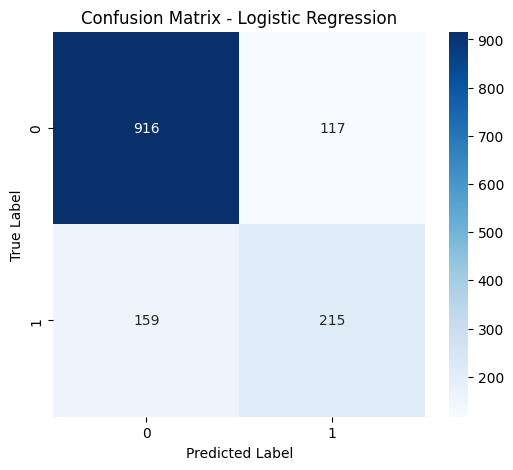

Confusion Matrix (Logistic Regression):
[[916 117]
 [159 215]]


In [18]:
# Confusion Matrix - Logistic Regression

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm_log = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(6,5))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("Confusion Matrix (Logistic Regression):")
print(cm_log)


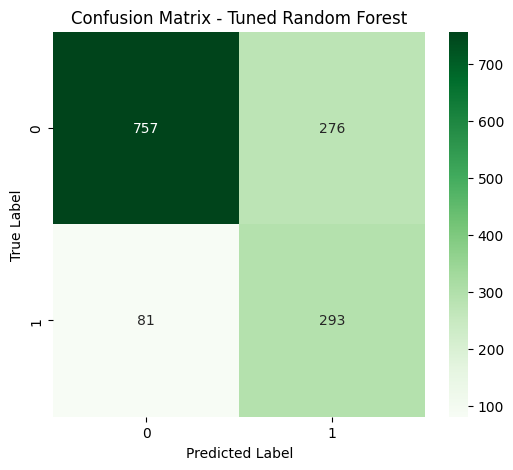

Confusion Matrix (Tuned Random Forest):
[[757 276]
 [ 81 293]]


In [19]:
# Confusion Matrix - Tuned Random Forest

cm_rf_t = confusion_matrix(y_test, y_pred_rf_t)

plt.figure(figsize=(6,5))
sns.heatmap(cm_rf_t, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Tuned Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("Confusion Matrix (Tuned Random Forest):")
print(cm_rf_t)


## Confusion Matrix Analysis

The Logistic Regression model is conservative in predicting churn. It generates fewer false positives (117) but misses a larger number of actual churners (159). This leads to moderate recall but higher precision.

In contrast, the Tuned Random Forest significantly reduces false negatives (81), successfully identifying more churners. However, it increases false positives (278), meaning more non-churn customers are incorrectly flagged.

This demonstrates a classic precision-recall trade-off:

- Logistic Regression prioritizes precision and overall balance.
- Tuned Random Forest prioritizes recall and churn detection sensitivity.

In churn prediction scenarios, higher recall is often preferred because missing a churner can result in revenue loss. Therefore, the Tuned Random Forest may be more suitable in a business context where customer retention is critical.


In [20]:
# Save Models and Preprocessing Objects

import joblib
import os

# Create folder if not exists
os.makedirs("saved_models", exist_ok=True)

# Save models
joblib.dump(log_model, "saved_models/logistic_regression.pkl")
joblib.dump(dt_model_tuned, "saved_models/decision_tree.pkl")
joblib.dump(knn_model, "saved_models/knn.pkl")
joblib.dump(nb_model, "saved_models/naive_bayes.pkl")
joblib.dump(rf_model_tuned, "saved_models/random_forest.pkl")
joblib.dump(xgb_model, "saved_models/xgboost.pkl")

# Save scaler
joblib.dump(scaler, "saved_models/scaler.pkl")

# Save feature column order
joblib.dump(X.columns.tolist(), "saved_models/feature_columns.pkl")

print("All models and preprocessing objects saved successfully.")


All models and preprocessing objects saved successfully.
